<a href="https://colab.research.google.com/github/23f1002944/EDA-Probability-Distributions/blob/main/EDA_Poisonn_and_Geometric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poisonn Distribution
It is a special case of Binomial Distribution where n is very large and p is very small

Lambda= Rate Parameter (Avg no of occurence in an interval)

It models the probability of given number of events in a fixed interval of time or space

Useful for modeling rare events over time or space, example P of 4 calls received per minute in a call center

Let's load a call centre data to predict number of calls arriving

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gayatriwagadre/pwc-call-centre-analysis")

print("Path to dataset files:", path)

100%|██████████| 631k/631k [00:00<00:00, 76.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/gayatriwagadre/pwc-call-centre-analysis/versions/1


In [19]:
import pandas as pd
df = pd.read_excel(path + "/01 Call-Center-Dataset.xlsx")
df.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0


In [4]:
df.describe()

,Speed of answer in seconds,Satisfaction rating
count,4054.000000,4054.000000
mean,67.520720,3.403552
std,33.592872,1.212220
min,10.000000,1.000000
25%,39.000000,3.000000
50%,68.000000,3.000000
75%,97.000000,4.000000
max,125.000000,5.000000


In [6]:
df.size

50000

In [8]:
df.shape

(5000, 10)

In [10]:
df.tail()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
4995,ID4996,Jim,2021-03-31,16:37:55,Payment related,Y,Y,22.0,00:05:40,1.0
4996,ID4997,Diane,2021-03-31,16:45:07,Payment related,Y,Y,100.0,00:03:16,3.0
4997,ID4998,Diane,2021-03-31,16:53:46,Payment related,Y,Y,84.0,00:01:49,4.0
4998,ID4999,Jim,2021-03-31,17:02:24,Streaming,Y,Y,98.0,00:00:58,5.0
4999,ID5000,Diane,2021-03-31,17:39:50,Contract related,N,N,NaN,NaN,NaN


In [20]:
import pandas as pd

# Combine 'Date' and 'Time' columns to create datetime objects
df['DateTime'] = df['Date'].astype(str) + ' ' + df['Time'].astype(str)
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Calculate the difference between the last and first datetime objects
time_difference = df.iat[4999, df.columns.get_loc('DateTime')] - df.iat[0, df.columns.get_loc('DateTime')]

print(f"The difference between the last and first call time is: {time_difference}")

The difference between the last and first call time is: 89 days 08:26:52


In [25]:
# Create a new dataframe with entries only for 2021-01-01
df_2021_01_01 = df[df['Date'] == '2021-01-01'].copy()

# Display the new dataframe
display(df_2021_01_01.head())

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,DateTime
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0,2021-01-01 09:12:58
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0,2021-01-01 09:12:58
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0,2021-01-01 09:47:31
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0,2021-01-01 09:47:31
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0,2021-01-01 10:00:29


In [46]:
import pandas as pd

# Combine 'Date' and 'Time' columns to create datetime objects
df_2021_01_01['DateTime'] = df_2021_01_01['Date'].astype(str) + ' ' + df_2021_01_01['Time'].astype(str)
df_2021_01_01['DateTime'] = pd.to_datetime(df_2021_01_01['DateTime'])

# Calculate the difference between the last and first datetime objects
time_difference = df_2021_01_01.iat[-1, df_2021_01_01.columns.get_loc('DateTime')] - df_2021_01_01.iat[0, df_2021_01_01.columns.get_loc('DateTime')]

print(f"The difference between the last and first call time is: {time_difference}")
print("Total number of calls =" , len(df_2021_01_01))
print("Rate parameter lambda =" , len(df_2021_01_01)/(time_difference.total_seconds()/3600))
L=len(df_2021_01_01)/(time_difference.total_seconds()/3600)
print(L)

The difference between the last and first call time is: 0 days 08:44:09
Total number of calls = 58
Rate parameter lambda = 6.63932080511304
6.63932080511304


We know Lambda = number of calls per second = 0.11065
Now we want to model this as a Poisonn Discrete Distribution

But first, let's plot the calls vs time graph

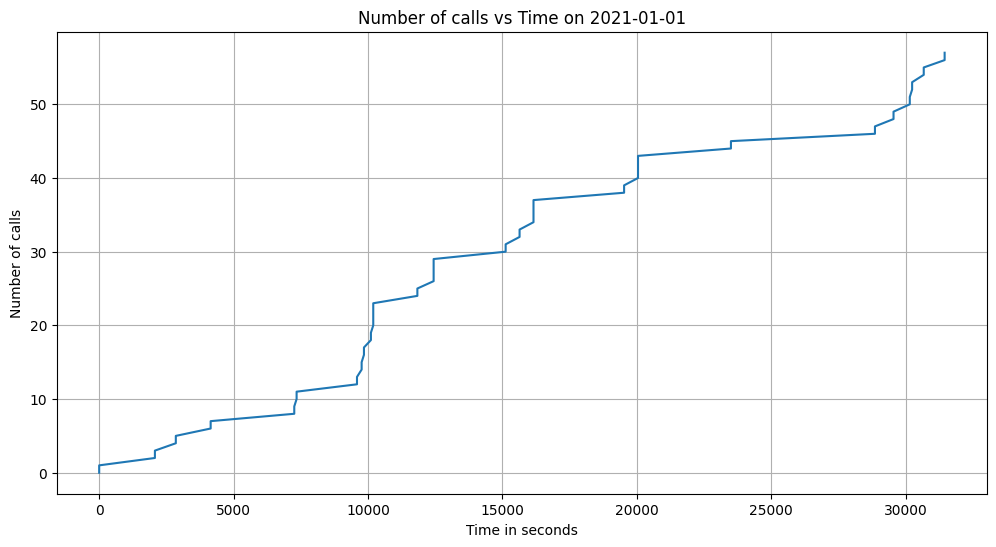

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate time in seconds relative to the first call
df_2021_01_01['Time_in_seconds'] = (df_2021_01_01['DateTime'] - df_2021_01_01['DateTime'].min()).dt.total_seconds()

# Plot number of calls vs time in seconds
plt.figure(figsize=(12, 6))
plt.plot(df_2021_01_01['Time_in_seconds'], np.arange(len(df_2021_01_01)))
plt.xlabel('Time in seconds')
plt.ylabel('Number of calls')
plt.title('Number of calls vs Time on 2021-01-01')
plt.grid(True)
plt.show()

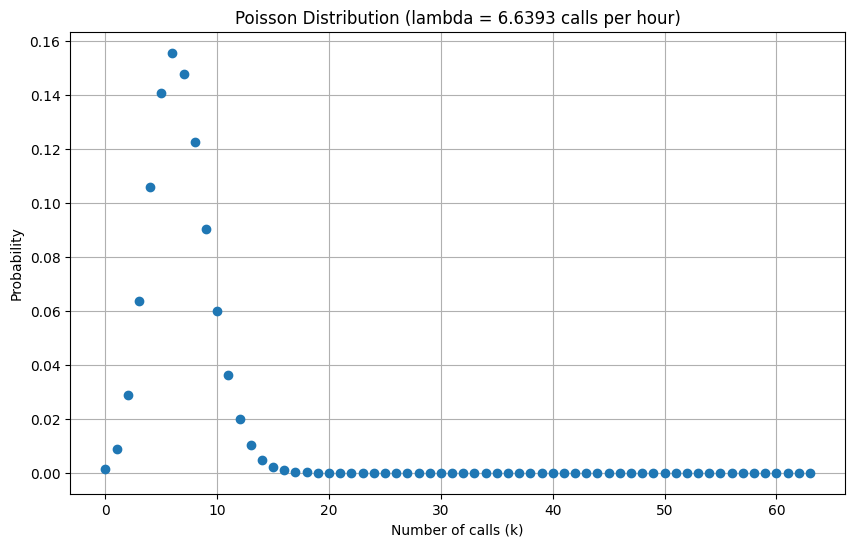

In [55]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'L' is already calculated and available from the previous cell

# Define a range of possible number of calls (k)
# Let's go up to a reasonable number of calls based on the observed data
max_calls = int(df_2021_01_01['Call Id'].count()) # Use the count of calls on 2021-01-01
k = np.arange(0, max_calls + 6) # Extend a bit beyond the max observed calls

# Calculate the probability mass function (PMF) for each k
poisson_pmf = poisson.pmf(k, L)

# Plot the Poisson distribution
plt.figure(figsize=(10, 6))
plt.plot(k, poisson_pmf, marker='o', linestyle='None')
plt.xlabel('Number of calls (k)')
plt.ylabel('Probability')
plt.title(f'Poisson Distribution (lambda = {L:.4f} calls per hour)')
plt.grid(True)
plt.show()

Here we go,
Plotted the poison distribution from the call centre dataset for the first day, which had total around 55 calls, with 6 calls per hour average

This is a rare event with lambda being a fixed parameter, we can see that it shows the probability of showing n number of calls per hour, with the max at around 6 which is lambda itself

*Now let's see the actual number of calls per hour frequency from the first day calls dataset*

In [50]:
df_2021_01_01.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,DateTime,Time_in_seconds
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0,2021-01-01 09:12:58,0.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0,2021-01-01 09:12:58,0.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0,2021-01-01 09:47:31,2073.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0,2021-01-01 09:47:31,2073.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0,2021-01-01 10:00:29,2851.0


In [52]:
df.tail()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,DateTime
4995,ID4996,Jim,2021-03-31,16:37:55,Payment related,Y,Y,22.0,00:05:40,1.0,2021-03-31 16:37:55
4996,ID4997,Diane,2021-03-31,16:45:07,Payment related,Y,Y,100.0,00:03:16,3.0,2021-03-31 16:45:07
4997,ID4998,Diane,2021-03-31,16:53:46,Payment related,Y,Y,84.0,00:01:49,4.0,2021-03-31 16:53:46
4998,ID4999,Jim,2021-03-31,17:02:24,Streaming,Y,Y,98.0,00:00:58,5.0,2021-03-31 17:02:24
4999,ID5000,Diane,2021-03-31,17:39:50,Contract related,N,N,NaN,NaN,NaN,2021-03-31 17:39:50


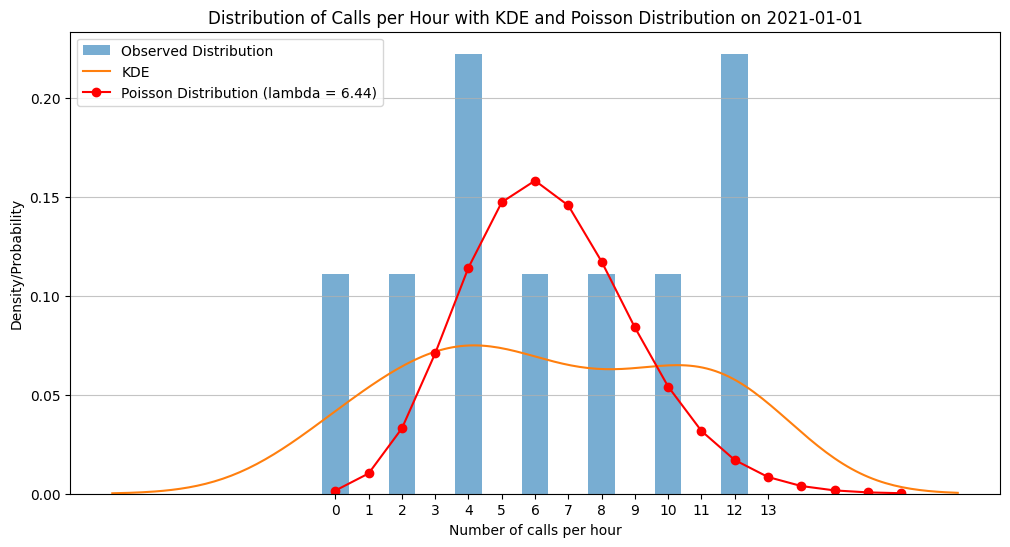

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
import numpy as np

# Resample the data to count calls per hour
calls_per_hour = df_2021_01_01.set_index('DateTime').resample('h').size()

# Calculate lambda for the hourly distribution (average calls per hour)
lambda_hourly = calls_per_hour.mean()

# Define a range of possible number of calls (k) for the Poisson distribution
k = np.arange(0, int(calls_per_hour.max()) + 6)

# Calculate the probability mass function (PMF) for each k using the hourly lambda
poisson_pmf = poisson.pmf(k, lambda_hourly)

# Plot a histogram of the calls per hour (observed distribution)
plt.figure(figsize=(12, 6))
plt.hist(calls_per_hour, bins=range(0, int(calls_per_hour.max()) + 2), align='left', rwidth=0.8, density=True, alpha=0.6, label='Observed Distribution')

# Apply KDE to the observed distribution
sns.kdeplot(calls_per_hour, bw_adjust=0.8, label='KDE', ax=plt.gca())

# Plot the theoretical Poisson distribution PMF
plt.plot(k, poisson_pmf, marker='o', linestyle='-', color='red', label=f'Poisson Distribution (lambda = {lambda_hourly:.2f})')


plt.xlabel('Number of calls per hour')
plt.ylabel('Density/Probability')
plt.title('Distribution of Calls per Hour with KDE and Poisson Distribution on 2021-01-01')
plt.xticks(range(0, int(calls_per_hour.max()) + 2))
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()

Clearly, there's a huge difference betwee the theoretical poisonn modeling and the actual distirbution

THis indicates that the dataset doesn't follow Poisonn distribution, one reason could be that the random variables are not IID or the sample size might be too small

The Poisson distribution assumes that events (in this case, call arrivals) occur independently and at a constant average rate over the given time interval. If the theoretical Poisson distribution is not matching the actual distribution, it could be due to one or more of the following reasons:

Non-constant arrival rate: The average number of calls per hour might not be constant throughout the day. There could be peak hours with higher call volumes and off-peak hours with lower volumes. The Poisson distribution assumes a fixed lambda, so variations in the arrival rate will cause a mismatch.
Dependent events: The Poisson distribution assumes that each event is independent of the others. In a call center, call arrivals might not be entirely independent. For example, marketing campaigns or system outages could lead to bursts of calls.
Interval length: The Poisson distribution is a good approximation for the number of events in a fixed interval when the events are relatively rare and the interval is not too short. If the interval is too long, variations in the arrival rate within the interval become more significant.
Based on the plot, it appears there might be some hours with a higher frequency of calls than the Poisson distribution predicts, and other hours with fewer calls, suggesting the arrival rate might not be constant throughout the day.